# Plotting an example window for each class

In [1]:
import os
import numpy as np
import numpy.ma as ma
import pylab as pl
import matplotlib.cm as cm
import skimage
import unidecode
import joblib
import skimage.color as skcolor
%matplotlib inline

In [2]:
data = joblib.load('../data/data.joblib')

In [3]:
img = data['img']

(-0.5, 2424.5, 2174.5, -0.5)

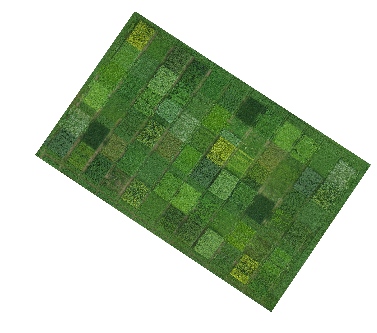

In [5]:
pl.figure(figsize=(6,6))
pl.imshow(img)
pl.axis('off')

In [7]:
labels = data['labels']['labels_1']['labels']
id2label = data['labels']['labels_1']['id2label']
labels = ma.masked_where(labels == -1, labels)

In [28]:
len(np.unique(labels.filled(0)))

24

In [36]:
print '\n'.join(id2label)

Avoine
CC4CA
Chanvre
Chia
Féverole
Lentille
Lin
M blanche
Moha
Navette
Niger
Phacélie
Pois
R chinois
R fourrager
Sarepta
Sarrasin
Simplex
Sol nu
Sorgho
Tampon
Tournesol
Trèfle
Vesce


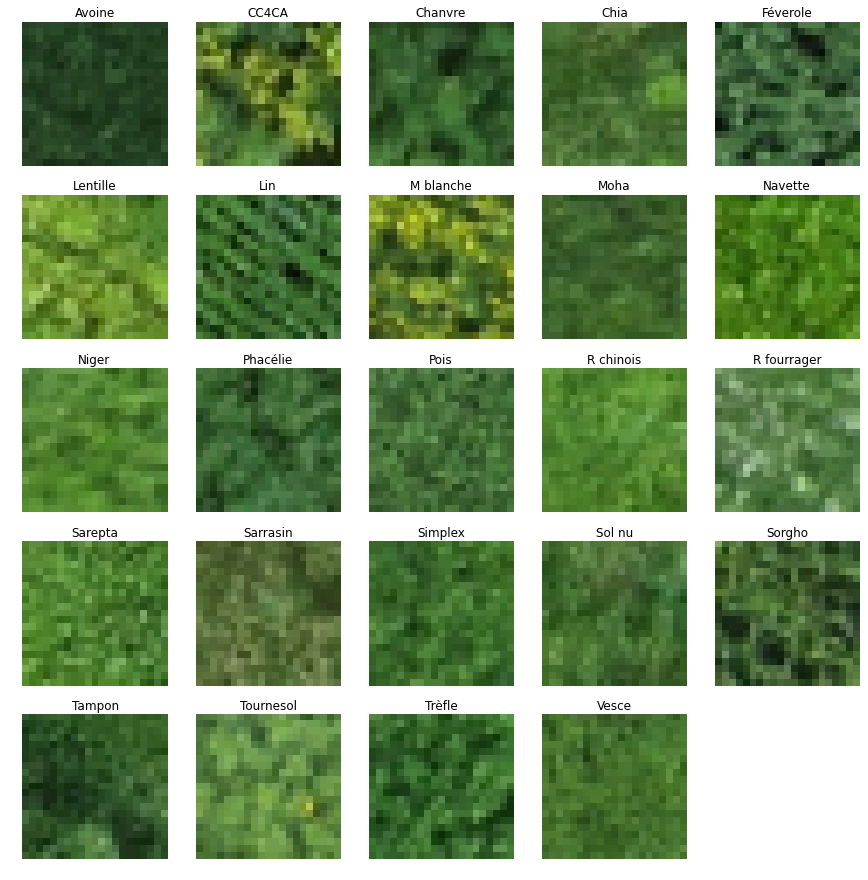

In [37]:
pl.figure(figsize=(15,15))

for lid, cname in enumerate(id2label):
    candidates = np.transpose(np.nonzero(labels == lid))
    ij = candidates[np.random.randint(candidates.shape[0])]
    
    subimg = img[ij[0]-10:ij[0]+11,ij[1]-10:ij[1]+11]

    pl.subplot(5, 5, lid + 1)
    pl.title(cname)
    pl.imshow(subimg, interpolation='nearest');
    pl.axis('off')
    
pl.savefig('../_imgs/per_class_example.png', dpi=150)